In [23]:
import json
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
import numpy
#from nltk.tokenize import word_tokenize

In [27]:
pa = pd.read_csv('pa.csv')
des = pa['Description']
des=des.to_string()

In [28]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
#sentences = sent_tokenize(des)
#tokenized_sent = word_tokenize(des)
unique_tokens = set(word_tokenize(des))

In [30]:
print(unique_tokens)

{'5004', 'Vistage', 'Watch', 'SERVICES', 'Unit', '5695', 'intern', 'Organics', 'er', '1568', 'DOJ', 'moderni', 'SUMMARY\\nInformatics', '707', 'optimizes', 'immutable', 'Well', 'NYSE', 'Index—the', 'Care', '1539', '709', '\\nPromotes', '5403', 'Currently', '1000', 'buil', '6113', 'applic', '87', 'Consultant\\nAre', 'Want', '5096', '2942', '27', '2860', '4033', 'newly', 'OVERVIEW\\n\\nThe', 'Cyber', '3349', '1770', '5748', '5894', '1127', '666', 'All-Source', '1112', 'INDIVIDUALS', 'Overview\\neBay', '6093', 'Do', 'Consulting', '2439', '2143', 'Keefe', '5111', '4462', 'Associates', '508', '4908', '760', 'growi', 'Allocates', '1374', 'SaaS-based', '3274', '5214', '2247', 'EquityZen', '4002', '1938', '60', 'Auctions', '1204', '1167', '2659', '4386', 'largest', '1269', '2423', '2283', '1114', '1803', '3210', 'OverviewT', 'AppLovin', '4666', '3170', 'G2\\nG2', 'Security', '2289', '3453', 'Integrator', 'Cogo', 'entry-level', '1733', '3904', 'Analyst\\nWriting', 'Summary\\nAs', '6040', '262',

In [31]:
# Make a frequency list of lengths
num_words = [len(tok) for tok in unique_tokens]

(array([7.392e+03, 2.241e+03, 1.010e+03, 4.970e+02, 2.100e+02, 1.370e+02,
        5.000e+01, 1.400e+01, 1.100e+01, 2.000e+00]),
 array([ 1. ,  4.6,  8.2, 11.8, 15.4, 19. , 22.6, 26.2, 29.8, 33.4, 37. ]),
 <a list of 10 Patch objects>)

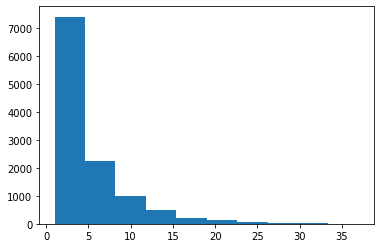

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(num_words)

In [34]:
# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in unique_tokens]

In [50]:
len(lower_tokens)

11564

In [35]:
bow_simple = Counter(lower_tokens)
print(bow_simple.most_common(10))

[('services', 3), ('unit', 3), ('do', 3), ('entry-level', 3), ('summary\\nthe', 3), ('operational', 3), ('applicants', 3), ('loan', 3), ('program', 3), ('location', 3)]


In [51]:
len(bow_simple) #not many repeated words?

10833

In [38]:
from nltk.stem import WordNetLemmatizer
alpha_only = [t for t in lower_tokens if t.isalpha()] #retain alphabetic words only

In [40]:
no_stops = [t for t in alpha_only if t not in stopwords.words('english')] #remove stop words

In [42]:
# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]
bow = Counter(lemmatized)
print(bow.most_common(100))

[('company', 6), ('service', 5), ('program', 5), ('location', 5), ('job', 5), ('product', 5), ('support', 5), ('u', 5), ('candidate', 5), ('associate', 4), ('applicant', 4), ('application', 4), ('project', 4), ('marketplace', 4), ('enterprise', 4), ('opportunity', 4), ('internship', 4), ('review', 4), ('solution', 4), ('analyst', 4), ('system', 4), ('game', 4), ('description', 4), ('partner', 4), ('start', 4), ('employee', 4), ('market', 4), ('work', 4), ('task', 4), ('opening', 4), ('professional', 4), ('life', 4), ('technology', 4), ('science', 4), ('owner', 4), ('scientist', 4), ('group', 4), ('position', 4), ('operation', 4), ('advisor', 4), ('make', 4), ('unit', 3), ('intern', 3), ('security', 3), ('operational', 3), ('loan', 3), ('time', 3), ('mu', 3), ('consultant', 3), ('machine', 3), ('industry', 3), ('client', 3), ('great', 3), ('requirement', 3), ('summary', 3), ('contract', 3), ('come', 3), ('fintech', 3), ('find', 3), ('purpose', 3), ('role', 3), ('ro', 3), ('medium', 3), 